In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [51]:
df = pd.read_csv('./data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Check for NaN values
NaN_values = df.isnull().sum()
print(NaN_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


CLEAN DATASET

In [53]:
# Clean the dataset
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1,'S':2})

# Replace NaN values by means
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())

# Drop the columns that are not useful
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [54]:
# Check for NaN values
NaN_values = df.isnull().sum()
print(NaN_values)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


SOME PLOTS

<Axes: >

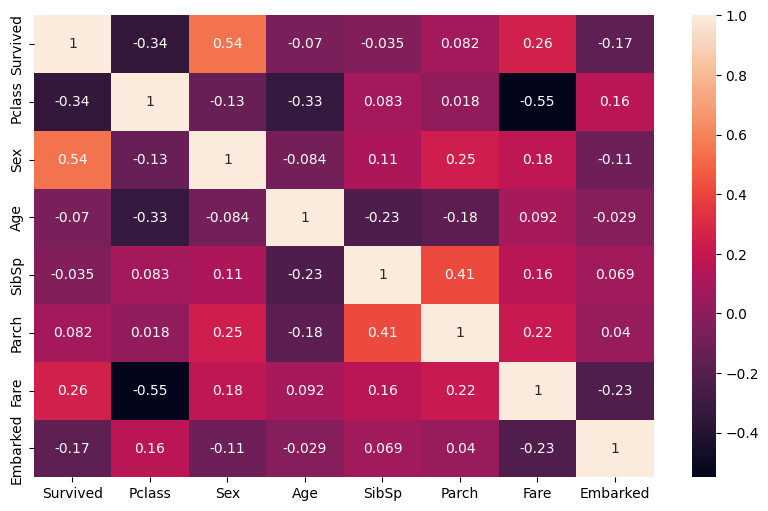

In [56]:
# Heatmap to visualize all data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Survived', ylabel='count'>

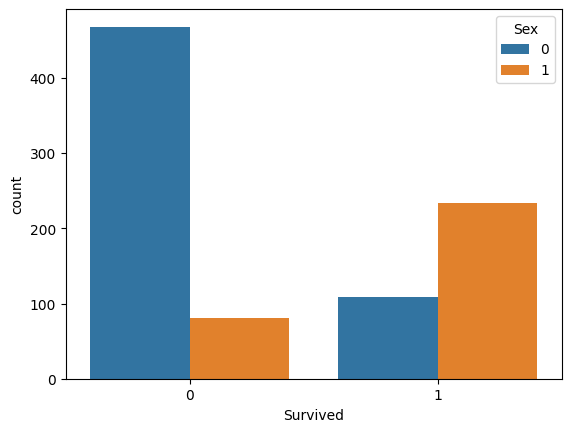

In [57]:
# SEX : male 0 - Female 1
# SURVIVED : no 0 - yes  1
# show the correlation between Sex and Survived
sns.countplot(x='Survived', hue='Sex', data=df)

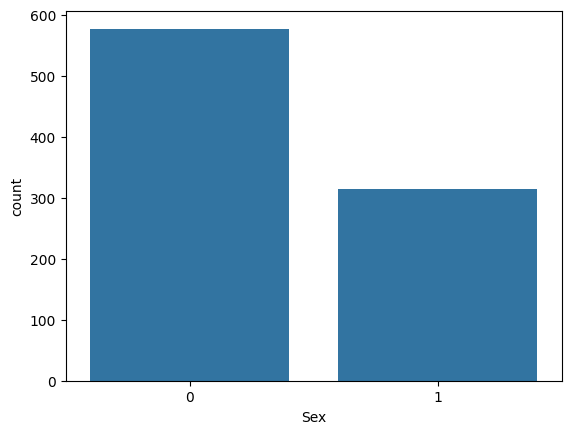

In [58]:
# Barplot of the number of female and male passengers
sns.countplot(data=df, x='Sex')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

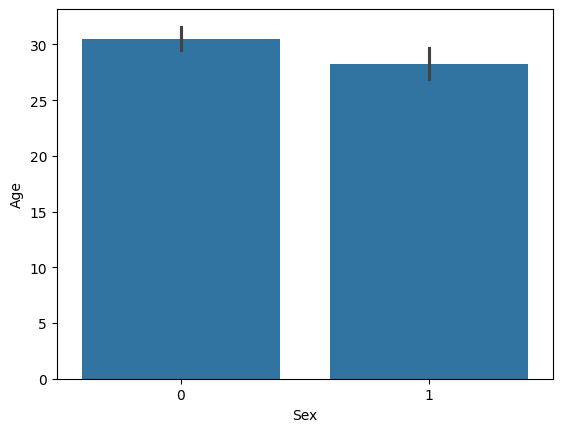

In [59]:
# plot with the correlation between the Age and the Sex
sns.barplot(x='Sex', y='Age', data=df)

In [60]:
# Division des données en ensembles d'entraînement et de test
X = df.drop('Survived', axis=1)
y = df['Survived']

TRAIN THE DATA

In [61]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy}')

df_predictions = pd.DataFrame({'PassengerId': range(892, 892 + len(X_test)), 'Survived': y_pred})
df_predictions.to_csv('./prediction/Titanic_pred.csv', index=False)

Accuracy: 0.7959641255605381


SAVE THE MODEL FOR THE APP

In [62]:
joblib.dump(model, './model/model_titanic.pkl')

['./model/model_titanic.pkl']